<a href="https://colab.research.google.com/github/MaddoxMarkKibati/Airplane-Crashes-Data-Cleaning/blob/main/Airplane_Crashes_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')
print(data.head())

         Date   Time                            Location  \
0  09/17/1908  17:18                 Fort Myer, Virginia   
1  07/12/1912  06:30             AtlantiCity, New Jersey   
2  08/06/1913    NaN  Victoria, British Columbia, Canada   
3  09/09/1913  18:30                  Over the North Sea   
4  10/17/1913  10:30          Near Johannisthal, Germany   

                 Operator Flight #          Route                    Type  \
0    Military - U.S. Army      NaN  Demonstration        Wright Flyer III   
1    Military - U.S. Navy      NaN    Test flight               Dirigible   
2                 Private        -            NaN        Curtiss seaplane   
3  Military - German Navy      NaN            NaN  Zeppelin L-1 (airship)   
4  Military - German Navy      NaN            NaN  Zeppelin L-2 (airship)   

  Registration cn/In  Aboard  Fatalities  Ground  \
0          NaN     1     2.0         1.0     0.0   
1          NaN   NaN     5.0         5.0     0.0   
2          NaN   NaN

In [ ]:
num_rows, num_cols = data.shape
print(f"There are {num_rows} rows and {num_cols} columns.")

There are 5268 rows and 13 columns.


In [ ]:
print("The last 75 rows in the dataset are:")
print(data.tail(75))

The last 75 rows in the dataset are:
            Date   Time                                           Location  \
5193  03/15/2008  08:15                                     Nbagu, Nigeria   
5194  04/03/2008  11:00                                     Lawa, Suriname   
5195  04/09/2008  23:27                                Bundeena, Australia   
5196  04/11/2008  22:15                                 Chrisinau, Moldova   
5197  04/15/2008  14:30                                        Goma, Congo   
...          ...    ...                                                ...   
5263  05/20/2009  06:30                             Near Madiun, Indonesia   
5264  05/26/2009    NaN                  Near Isiro, DemocratiRepubliCongo   
5265  06/01/2009  00:15  AtlantiOcean, 570 miles northeast of Natal, Br...   
5266  06/07/2009  08:30       Near Port Hope Simpson, Newfoundland, Canada   
5267  06/08/2009    NaN                  State of Arunachal Pradesh, India   

                          

In [ ]:
data.isnull().sum()

,0
Date,0
Time,2219
Location,20
Operator,18
Flight #,4199
Route,1707
Type,27
Registration,335
cn/In,1228
Aboard,22


| Column       | Data Type       | Missing Data Method                    | Justification                                                                                                                                                                                                                                                           |
|--------------|-----------------|----------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Time         | Object(String)  | Imputation with 'unknown'              | Time of day is missing in many cases but we cannot impute with median and mode since it isnt appropiate when dealing with time so instead we will use unknown so we dont introduce any bias.                                                                            |
| Location     | Object(String)  | Imputation with 'unknown'              | Although there are few missing values, using other means such as mode would be an assumption of data which in the case of an airplane crash isnt appropriate, so unknowns will be used.                                                                                 |
| Operator     | Object(String)  | Imputation with Mode                   | There are very few missing values so using mode can be used to fill in the missing values.                                                                                                                                                                              |
| Flight       | Object(Numeric) | Imputation with 'N/A'                  | Very many values are missing either because many crashes were not given a standardised flight number or military/private flights kept their flight number details hidden su using a placeholder value like 'N/A' would help preserve the record without assuming an ID. |
| Route        | Object(String)  | Imputation with 'unknown'              | Missing values are a lot so using an 'unknown' placeholder would not give a value to suggest an incorrect route.                                                                                                                                                        |
| Type         | Object(String)  | Imputation with 'unknown'              | While Imputing with mode could be a good approach due to the very few missing values, it would make assumptions and introduce bias to a type of aircraft used so unknown would just be the safest bet.                                                                  |
| Registration | Object(String)  | Imputation with 'unknown'              | This is a category of unique identifiers so an actual value would be false so we just use unknown.                                                                                                                                                                      |
| Abroad       | Object(Numeric) | Imputation with Median                 | Very few missing values which can let use use median to preserve the statistics of the data.                                                                                                                                                                            |
| Fatalities   | Object(Numeric) | Imputation with zero                   | There are very few values missing which would help with the assumption that missing values imply that there were no fatalities as fatalities are explictly reported and would be logged.                                                                                |
| Ground       | Object(Numeric) | Imputation with zero                   | The same justification as air fatalities, ground fatalities would be properly defined and thus missing values can be assumed to be zero values.                                                                                                                         |
| Summary      | Object(String)  | Imputations with 'No summary provided' | A placeholder can be used to show that info was missing without trying to fabricate a summary.                                                                                                                                                                          |

Table was generated with markdown table generator: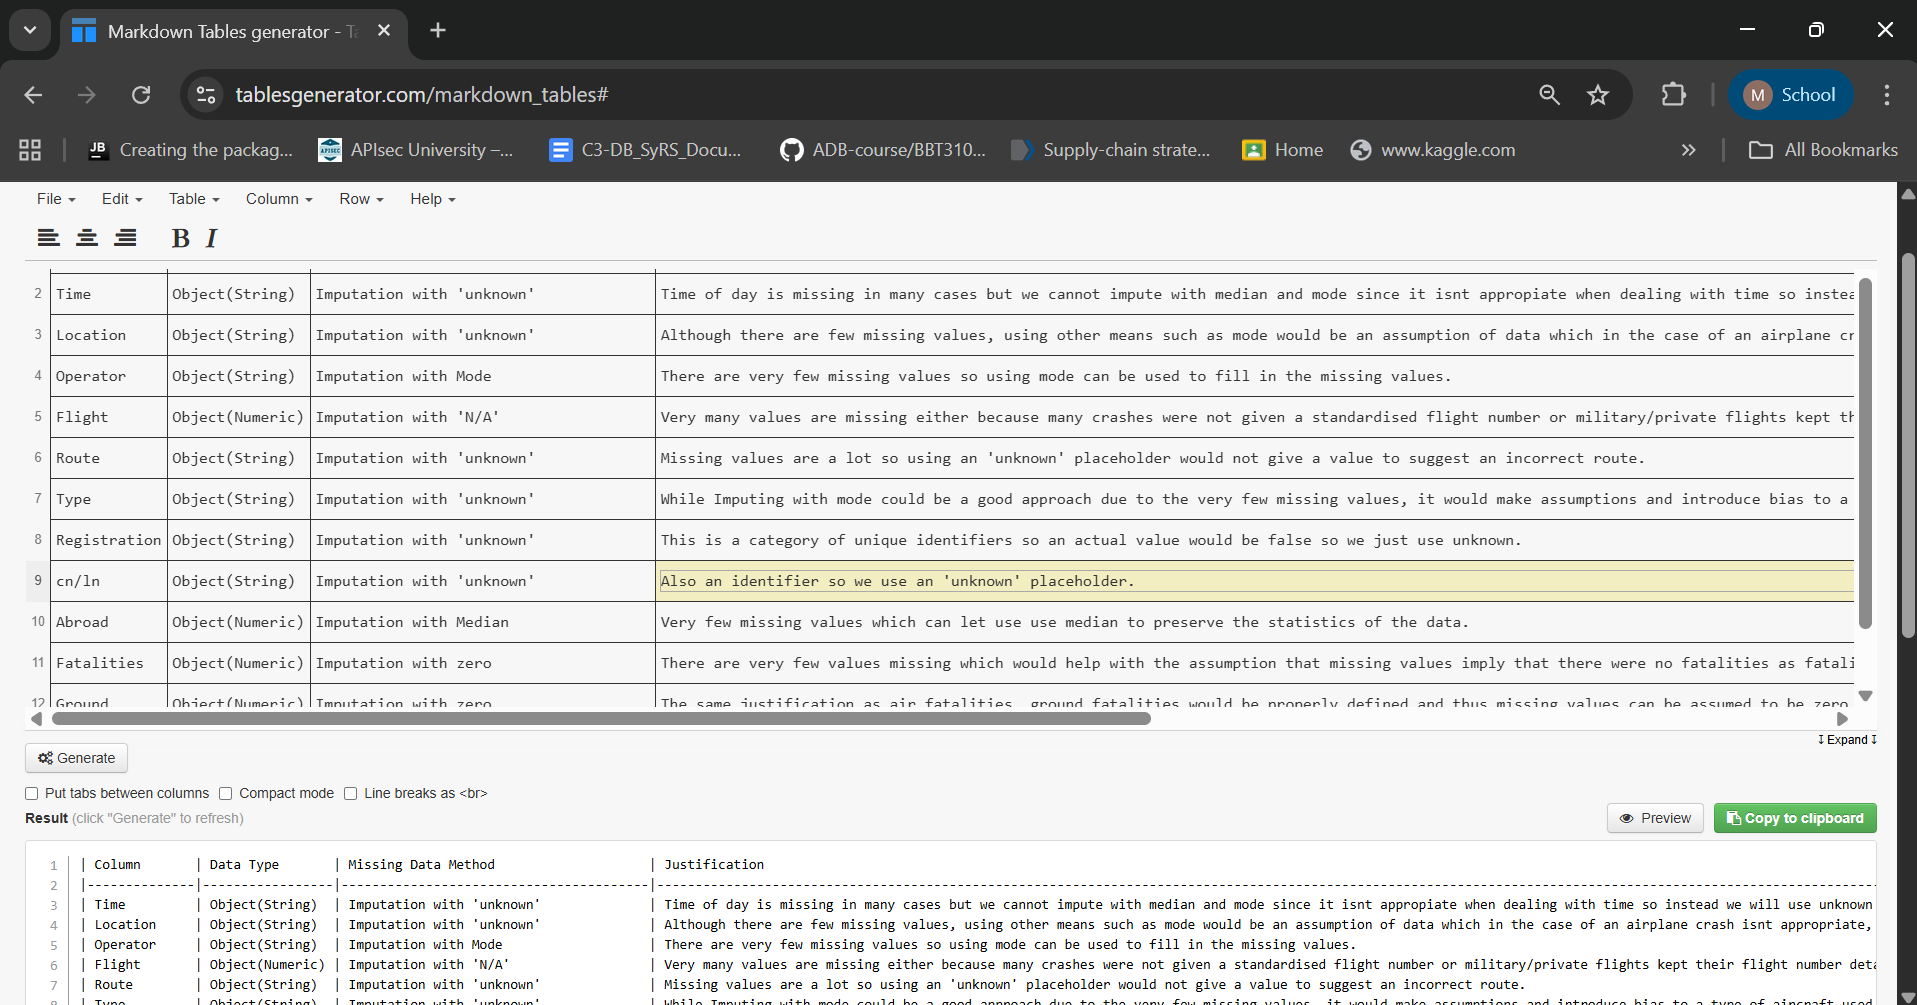


In [ ]:
fatality_locations =  data[['Date', 'Location', 'Aboard', 'Fatalities']].copy()
print(fatality_locations.head(10))

         Date                            Location  Aboard  Fatalities
0  09/17/1908                 Fort Myer, Virginia     2.0         1.0
1  07/12/1912             AtlantiCity, New Jersey     5.0         5.0
2  08/06/1913  Victoria, British Columbia, Canada     1.0         1.0
3  09/09/1913                  Over the North Sea    20.0        14.0
4  10/17/1913          Near Johannisthal, Germany    30.0        30.0
5  03/05/1915                     Tienen, Belgium    41.0        21.0
6  09/03/1915               Off Cuxhaven, Germany    19.0        19.0
7  07/28/1916               Near Jambol, Bulgeria    20.0        20.0
8  09/24/1916                 Billericay, England    22.0        22.0
9  10/01/1916                Potters Bar, England    19.0        19.0


In [ ]:
max_fatalities_record = fatality_locations.loc[fatality_locations['Fatalities'].idxmax()]

date_of_max_fatalities = max_fatalities_record['Date']
highest_fatality_count = max_fatalities_record['Fatalities']

print(f"The date of the highest number of fatalties was: {date_of_max_fatalities}")
print(f"Number of fatalities on that date: {highest_fatality_count}")

The date of the highest number of fatalties was: 03/27/1977
Number of fatalities on that date: 583.0


In [ ]:
crashes_with_no_fatalities = fatality_locations[fatality_locations['Fatalities'] == 0].shape[0]
print(f"Total number of recorded crashes: {fatality_locations.shape[0]}")
print(f"The number of crashes with no fatalities was: {crashes_with_no_fatalities}")

Total number of recorded crashes: 5268
The number of crashes with no fatalities was: 58


In [ ]:
location_split = fatality_locations['Location'].str.rsplit(',', n=1, expand=True)

fatality_locations['Region'] = location_split[0]
fatality_locations['Country/State'] = location_split[1]

mask_single_term = fatality_locations['Country/State'].isna()
fatality_locations.loc[mask_single_term, 'Country/State'] = fatality_locations.loc[mask_single_term, 'Region']
fatality_locations.loc[mask_single_term, 'Region'] = 'unspecified'

mask_unknown = (fatality_locations['Country/State'] == 'unknown')
fatality_locations = fatality_locations.drop(columns=['Location'])
print(fatality_locations.head())


         Date  Aboard  Fatalities                      Region  \
0  09/17/1908     2.0         1.0                   Fort Myer   
1  07/12/1912     5.0         5.0                 AtlantiCity   
2  08/06/1913     1.0         1.0  Victoria, British Columbia   
3  09/09/1913    20.0        14.0                 unspecified   
4  10/17/1913    30.0        30.0           Near Johannisthal   

        Country/State  
0            Virginia  
1          New Jersey  
2              Canada  
3  Over the North Sea  
4             Germany  


In [ ]:
fatality_locations_ordered = fatality_locations.sort_values(by='Fatalities', ascending=False)

top_100_fatal_crashes = fatality_locations_ordered.head(100)
print("Head of the top 100 fatal crashes:")
print(top_100_fatal_crashes.head())
print(f"\nNumber of rows in top_100_fatal_crashes: {top_100_fatal_crashes.shape[0]}")

Head of the top 100 fatal crashes:
            Date  Aboard  Fatalities                          Region  \
2963  03/27/1977   644.0       583.0                        Tenerife   
3568  08/12/1985   524.0       520.0  Mt. Osutaka, near Ueno Village   
4455  11/12/1996   349.0       349.0               Near Charkhidadri   
2726  03/03/1974   346.0       346.0               Near Ermenonville   
3562  06/23/1985   329.0       329.0                    AtlantiOcean   

                   Country/State  
2963              Canary Islands  
3568                       Japan  
4455                       India  
2726                      France  
3562   110 miles West of Ireland  

Number of rows in top_100_fatal_crashes: 100


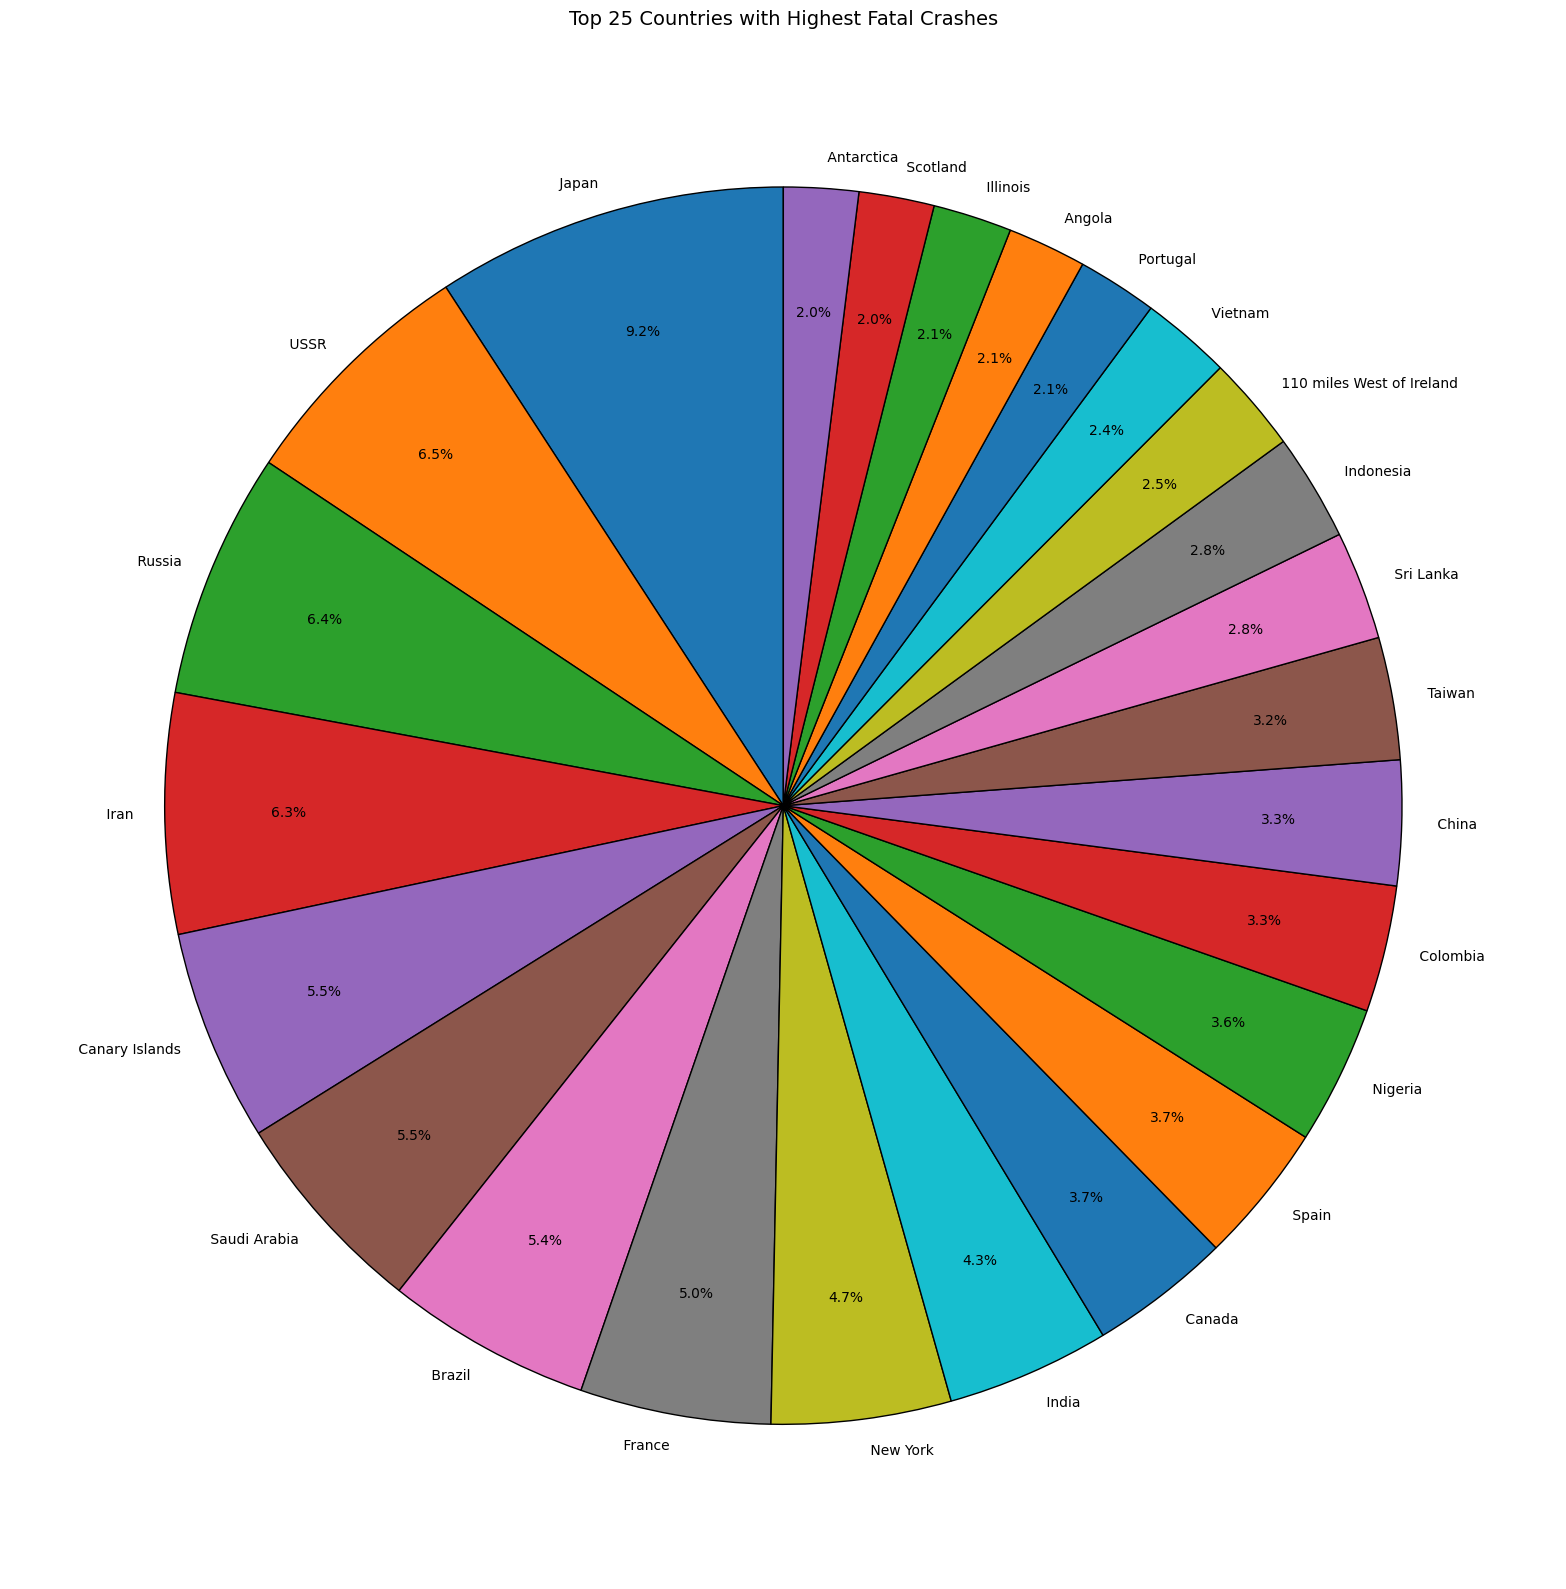

In [ ]:
country_fatalities = top_100_fatal_crashes.groupby('Country/State')['Fatalities'].sum()
top_25_countries = country_fatalities.nlargest(25)

plt.figure(figsize=(16,16))
plt.pie(
    top_25_countries,
    labels=top_25_countries.index,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 10},
    wedgeprops={'edgecolor': 'black'},
    pctdistance=0.8,
    labeldistance=1.05
)

plt.title('Top 25 Countries with Highest Fatal Crashes', fontsize=14)
plt.tight_layout()
plt.savefig('top_fatalities_pie_chart_final.png')

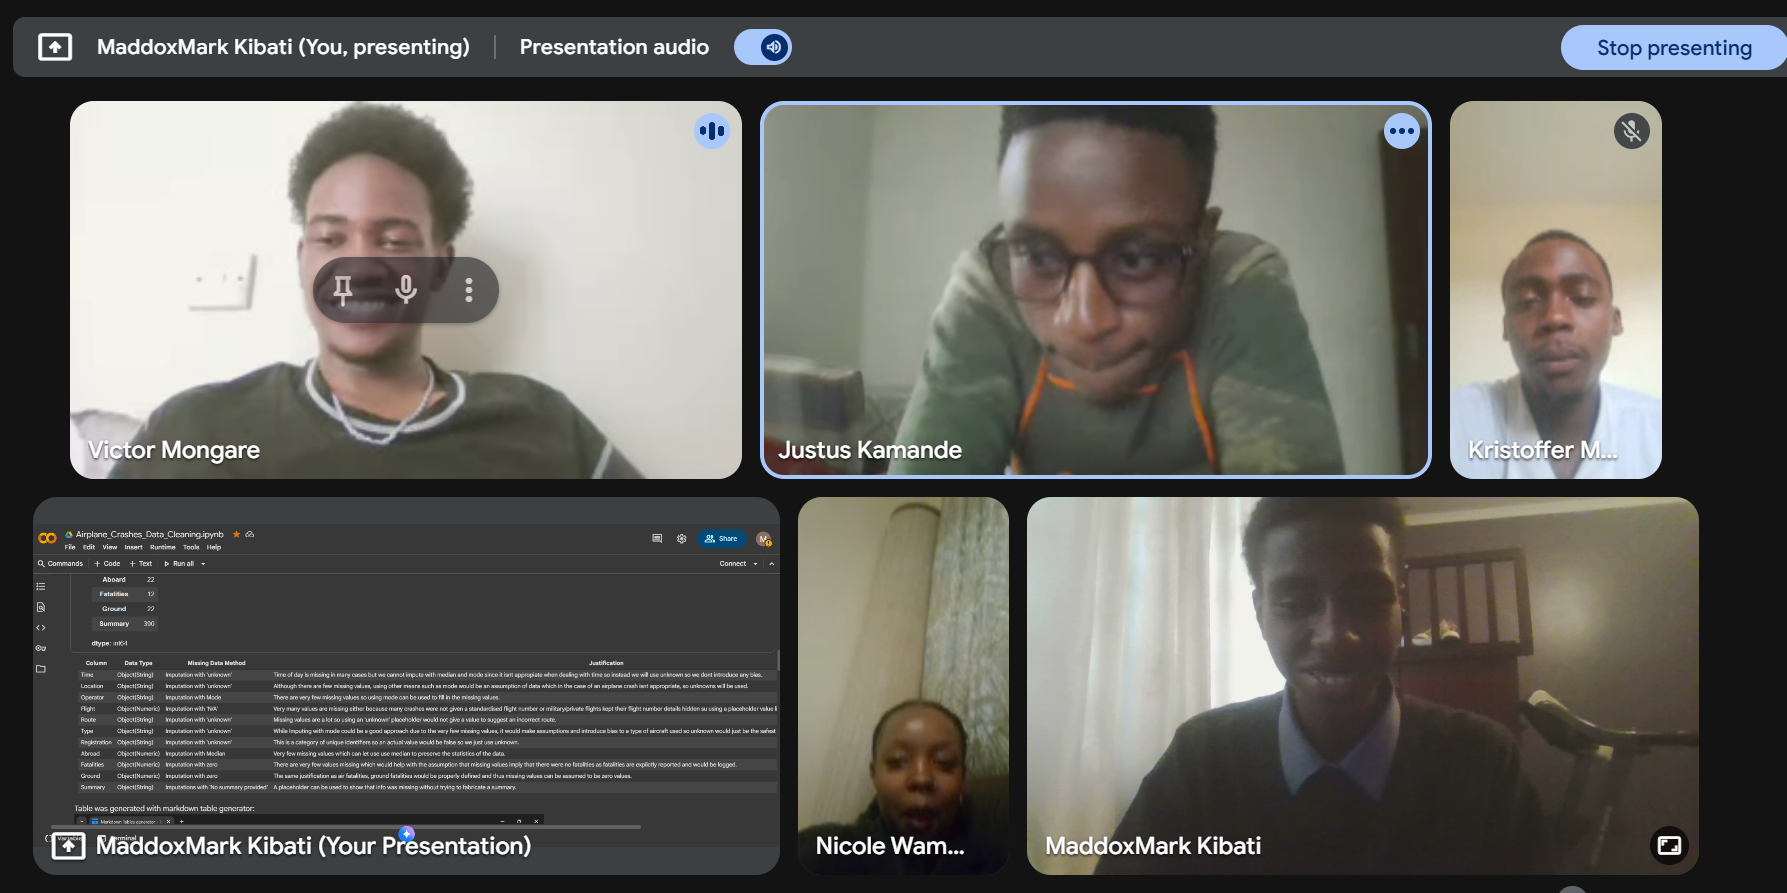